#**IMPORTANDO E ANALISANDO OS DADOS:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("iris.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Verificando se há dados nulos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


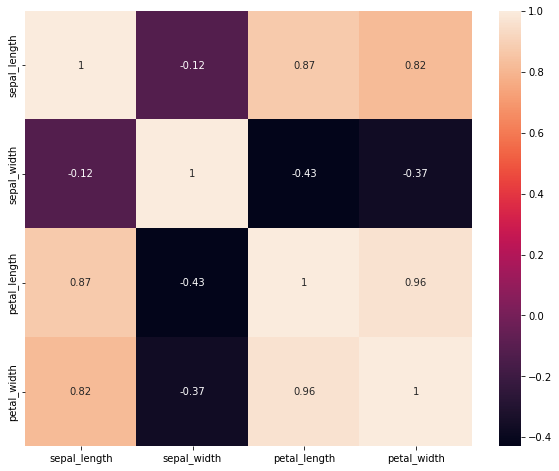

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

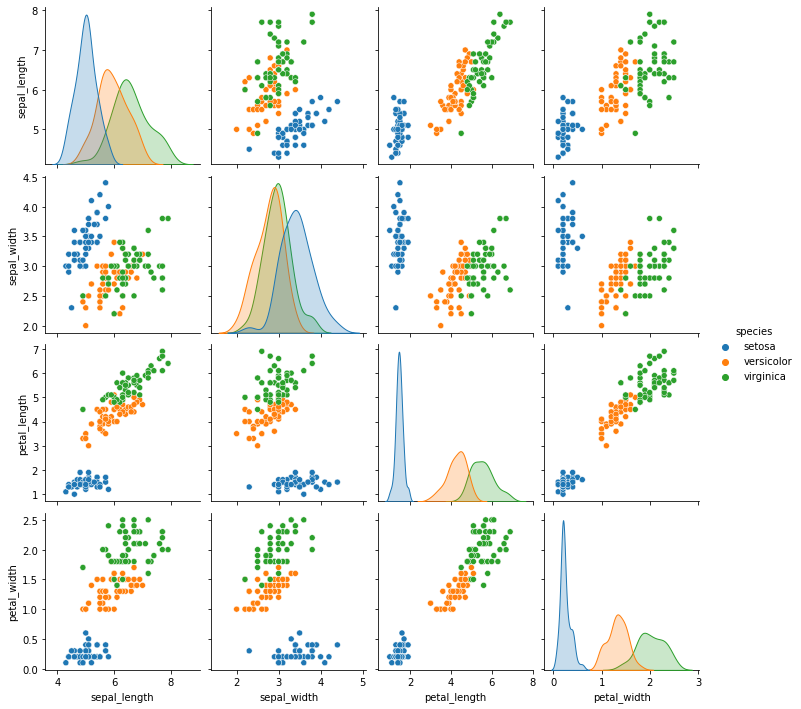

In [ ]:
sns.pairplot(df, hue="species");

# **MACHINE LEARNING MODELS**

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

##**LOGISTC REGRESSION**

In [4]:

X = df.drop(columns=["species"])
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

# ==========================================================
# ==========================================================
# o que eu vou fazer com as features numéricas

pipe_features_num = Pipeline([("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================

pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num)])

# pipeline final
pipe_lr_iris = Pipeline([("pre_processador", pre_processador),
                    ("pca", PCA(n_components=2)),
                    ("lr", LogisticRegression(random_state=42))])

# ============================================

params_grid_lr_iris = {"lr__penalty": ["l1", "l2", "elasticnet"], 
                  "lr__C" : [0.1, 1, 10],
                  "lr__l1_ratio" : [0.1, 0.5, 0.9],
                  "lr__solver" : ["saga"]} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lr_iris = GridSearchCV(estimator=pipe_lr_iris,
                       param_grid=params_grid_lr_iris,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10)

grid_lr_iris.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga
[CV 1/5; 1/27] END lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga;, score=0.952 total time=   0.0s
[CV 2/5; 1/27] START lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga
[CV 2/5; 1/27] END lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga;, score=0.905 total time=   0.0s
[CV 3/5; 1/27] START lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga
[CV 3/5; 1/27] END lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga;, score=0.903 total time=   0.0s
[CV 4/5; 1/27] START lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga
[CV 4/5; 1/27] END lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga;, score=1.000 total time=   0.0s
[CV 5/5; 1/27] START lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga
[CV 5/5; 1/27] END lr__C=0.1, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['sepal_length',
                                                                          'sepal_width',
                                                                          'petal_length',
                                                                          'petal_width'])])),
                                       ('pca', PCA(n_components=2)),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
            

In [5]:
grid_lr_iris.best_params_

{'lr__C': 10, 'lr__l1_ratio': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'saga'}

In [6]:
lr_iris_results = pd.DataFrame(grid_lr_iris.cv_results_)
lr_iris_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__l1_ratio,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.012209,0.000824,0.004155,0.000526,10,0.9,elasticnet,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.9, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
24,0.012317,0.001851,0.004151,0.000629,10,0.9,l1,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.9, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
23,0.011808,0.001512,0.003928,0.000263,10,0.5,elasticnet,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.5, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
22,0.011615,0.000318,0.003971,0.000157,10,0.5,l2,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.5, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
21,0.011476,0.000970,0.003967,0.000454,10,0.5,l1,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.5, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
20,0.013454,0.002784,0.004473,0.000950,10,0.1,elasticnet,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.1, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
19,0.011194,0.000927,0.004041,0.000468,10,0.1,l2,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.1, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
18,0.012711,0.001090,0.004000,0.000387,10,0.1,l1,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.1, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
25,0.013291,0.002430,0.004191,0.000329,10,0.9,l2,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.9, 'lr__penalt...",0.902778,0.952137,0.902778,1.000000,0.902778,0.932094,0.038965,1
17,0.011464,0.000371,0.004086,0.000287,1,0.9,elasticnet,saga,"{'lr__C': 1, 'lr__l1_ratio': 0.9, 'lr__penalty...",0.902778,0.904762,0.902778,1.000000,0.902778,0.922619,0.038698,10



Métricas de avaliação de treino:
[[35  0  0]
 [ 0 32  3]
 [ 0  2 33]]


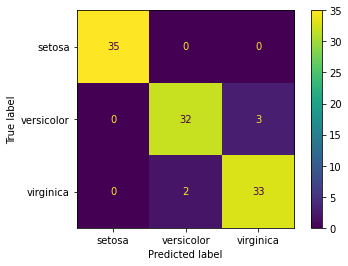

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.94      0.91      0.93        35
   virginica       0.92      0.94      0.93        35

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105


Métricas de avaliação de teste:
[[15  0  0]
 [ 0 12  3]
 [ 0  3 12]]


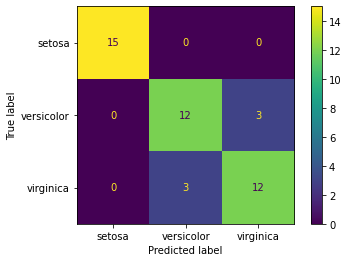

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.80      0.80      0.80        15
   virginica       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [7]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_iris = grid_lr_iris.predict(X_train)

print(confusion_matrix(y_train, y_pred_train_iris))

#plot_confusion_matrix(grid_lr_pca, X_train, y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_iris)
plt.show()

print(classification_report(y_train, y_pred_train_iris))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_iris = grid_lr_iris.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_iris))

#plot_confusion_matrix(grid_lr_pca, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_iris)
plt.show()

print(classification_report(y_test, y_pred_test_iris))

**Por que a Iris-Setosa está dando predição de 100%?Vamos ver que não é Overfitting**

Analisando os gráficos abaixo percebe-se que suas medidas são completamente diferentes das outras duas espécies.

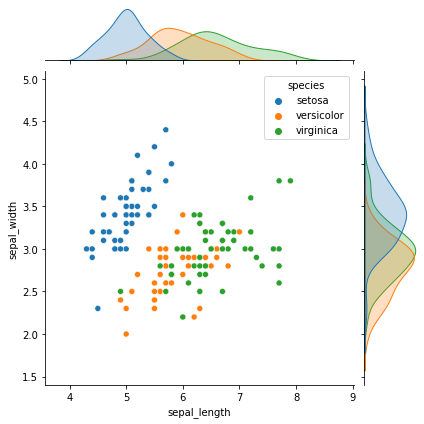

In [8]:
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind='scatter', hue="species");

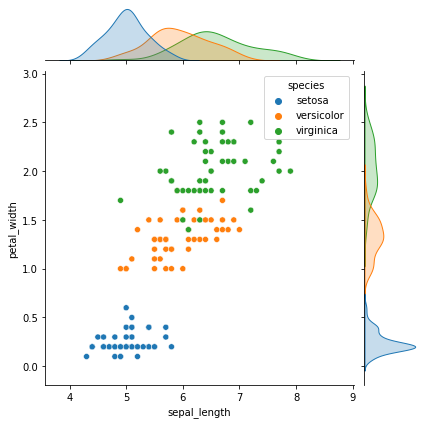

In [9]:
sns.jointplot(x='sepal_length', y='petal_width', data=df, kind='scatter', hue="species");

**Probabilidade de sair determinada espécie:**

In [10]:
especie = df["species"].unique()
print(f"{especie}")

['setosa' 'versicolor' 'virginica']


In [11]:
probas = grid_lr_iris.predict_proba(X_test)
probas

array([[2.51419793e-02, 9.73955583e-01, 9.02437628e-04],
       [9.07161803e-06, 4.20486087e-01, 5.79504842e-01],
       [3.35575459e-10, 7.62634097e-03, 9.92373659e-01],
       [7.52573015e-05, 9.13413295e-01, 8.65114477e-02],
       [9.98541746e-01, 1.45825416e-03, 1.38979830e-12],
       [9.97833480e-01, 2.16652032e-03, 3.30830624e-12],
       [3.23370316e-06, 4.63551998e-01, 5.36444769e-01],
       [1.60866219e-07, 6.25489479e-02, 9.37450891e-01],
       [2.32629312e-05, 7.01364789e-01, 2.98611948e-01],
       [9.99654991e-01, 3.45009299e-04, 3.02392144e-15],
       [4.29675488e-03, 9.94248625e-01, 1.45462034e-03],
       [1.82022746e-09, 9.49314552e-03, 9.90506853e-01],
       [4.36893083e-05, 8.03775959e-01, 1.96180352e-01],
       [1.52604110e-09, 1.78767772e-02, 9.82123221e-01],
       [6.32838342e-03, 9.91610242e-01, 2.06137420e-03],
       [6.39970176e-09, 1.74511502e-02, 9.82548843e-01],
       [9.99289021e-01, 7.10978502e-04, 7.22986958e-14],
       [9.99930278e-01, 6.97217

In [12]:
tabela_iris = pd.DataFrame()

In [13]:
tabela_iris["Amostra existente"] = y_test

In [14]:
tabela_iris["Predição"] = y_pred_test_iris

In [15]:
tabela_iris

,Amostra existente,Predição
93,versicolor,versicolor
83,versicolor,virginica
117,virginica,virginica
65,versicolor,versicolor
9,setosa,setosa
34,setosa,setosa
148,virginica,virginica
114,virginica,virginica
127,virginica,versicolor
15,setosa,setosa


In [16]:
import pickle

In [17]:
with open("grid_lr_iris.pkl", "wb") as f:
    pickle.dump(grid_lr_iris, f)

In [ ]:
with open("grid_lr_iris.pkl", "rb") as f:
    
    grid_lr_iris = pickle.load(f)

##**XGBOOST**

In [18]:
from xgboost.sklearn import XGBClassifier
#Separando o que é features e target:
X = df.drop(columns=["species"])
y = df["species"]

# Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas. Tratando os valores nulos (NaN) e escalonando já que a variância entre as features é grande.
pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

# Pegando só as features numéricas
features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                      ("pca", PCA(n_components=2)),
                     ("xgbr", XGBClassifier(eval_metric='logloss', random_state=42))])


# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [1000],
                   "xgbr__max_depth": [2],
                   "xgbr__learning_rate": [0.01],
                   "xgbr__colsample_bytree": [0.5],
                   "xgbr__subsample": [0.5]}

#Motando a grade geral de parâmetros.
grid_xgbr = GridSearchCV(estimator=pipe_xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="r2",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

grid_xgbr.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['sepal_length',
                                                                          'sepal_width',
                                                                          'petal_length',
                                                                          'petal_width'])]


Métricas de avaliação de treino:
[[40  0  0]
 [ 0 39  2]
 [ 0  1 38]]


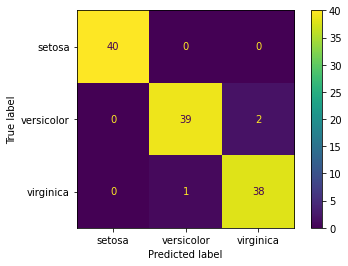

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.95      0.96        41
   virginica       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120


Métricas de avaliação de teste:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


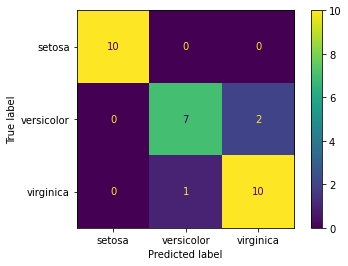

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [19]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_xgbr = grid_xgbr.predict(X_train)

print(confusion_matrix(y_train, y_pred_train_xgbr))

#plot_confusion_matrix(grid_xgbr, X_train, y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_xgbr)
plt.show()

print(classification_report(y_train, y_pred_train_xgbr))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_xgbr = grid_xgbr.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_xgbr))

#plot_confusion_matrix(grid_xgbr, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_xgbr)
plt.show()

print(classification_report(y_test, y_pred_test_xgbr))

**Probabilidade de sair determinada espécie:**

In [20]:
especie = df["species"].unique()
print(f"{especie}")

['setosa' 'versicolor' 'virginica']


In [21]:
probas = grid_xgbr.predict_proba(X_test)
probas

array([[0.01679111, 0.87531614, 0.10789277],
       [0.98251027, 0.00935614, 0.00813355],
       [0.01968679, 0.03695298, 0.9433602 ],
       [0.01150014, 0.9358055 , 0.05269437],
       [0.01822611, 0.12655053, 0.85522336],
       [0.9786289 , 0.01522435, 0.00614684],
       [0.03161605, 0.8922801 , 0.07610391],
       [0.01119674, 0.03757938, 0.9512239 ],
       [0.01695898, 0.265648  , 0.717393  ],
       [0.01864857, 0.93412936, 0.04722207],
       [0.02103746, 0.14645626, 0.8325063 ],
       [0.95135164, 0.02395902, 0.02468929],
       [0.95679104, 0.0322171 , 0.01099181],
       [0.9656094 , 0.01391626, 0.02047434],
       [0.9821133 , 0.00942093, 0.00846578],
       [0.0123181 , 0.9359218 , 0.05176007],
       [0.01981053, 0.04256353, 0.9376259 ],
       [0.01174558, 0.9662788 , 0.02197561],
       [0.02164161, 0.8641035 , 0.11425485],
       [0.00959296, 0.04160325, 0.94880384],
       [0.95786697, 0.01872521, 0.02340788],
       [0.03254095, 0.7470515 , 0.2204076 ],
       [0.

In [22]:
tabela_iris_xgbr = pd.DataFrame()

In [23]:
tabela_iris_xgbr["Amostra existente"] = y_test

In [24]:
tabela_iris_xgbr["Predição"] = y_pred_test_xgbr

In [25]:
tabela_iris_xgbr

,Amostra existente,Predição
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,virginica
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,virginica
82,versicolor,versicolor


In [26]:
import pickle

In [27]:
with open("grid_xgbr.pkl", "wb") as f:
    pickle.dump(grid_lr_iris, f)

In [ ]:
with open("grid_xgbr.pkl", "rb") as f:
    
    grid_xgbr = pickle.load(f)

# **INTERPRETABILIDADE DO MODELO - POR AMOSTRA**

**Usaremos a Regressão Logística para a interpretabilidade...**

In [28]:
df = pd.read_csv("iris.csv")

X = df.drop(columns=["species"])
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
lr = LogisticRegression().fit(X_train, y_train)


Métricas de avaliação de treino:
[[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]


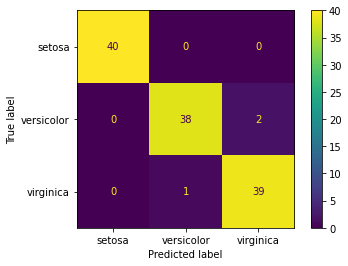

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.95      0.96        40
   virginica       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


Métricas de avaliação de teste:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


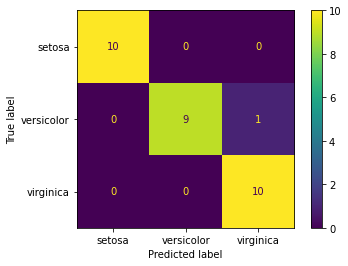

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("\nMétricas de avaliação de treino:")

y_pred_train = lr.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
!pip install lime
from lime import lime_tabular

In [32]:
lr.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [33]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              mode="classification",
                                              feature_names=lr.feature_names_in_,
                                              class_names=df["species"])

**Pegaremos a primeira amostra e ver o quanto as features interferiram no resultado:**

In [34]:
df["species"][0]

'setosa'

In [35]:
X_test.iloc[[0]]

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2


In [37]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              mode="classification",
                                              feature_names=lr.feature_names_in_,
                                              class_names=lr.classes_)

In [38]:
explanation = explainer.explain_instance(X_test.iloc[0],
                                         lr.predict_proba,
                                         num_features=lr.n_features_in_)
explanation.show_in_notebook()

#**INTERPRETABILIDADE DO MODELO GLOBALMENTE**

In [39]:
df = pd.read_csv("iris.csv")

X = df.drop(columns=["species"])
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
lr_shap = LogisticRegression().fit(X_train, y_train)


Métricas de avaliação de treino:
[[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]


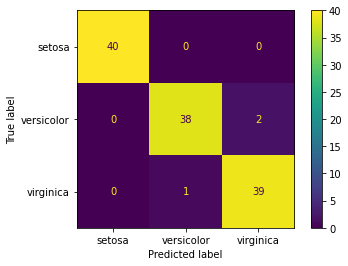

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.95      0.96        40
   virginica       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


Métricas de avaliação de teste:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


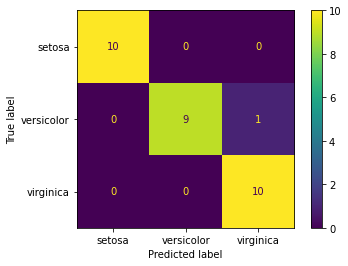

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [41]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("\nMétricas de avaliação de treino:")

y_pred_train = lr_shap.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [42]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.4 MB/s 


In [43]:
explainer = shap.Explainer(lr_shap, X_train)

In [44]:
shap_vals = explainer.shap_values(X_train)

shap_vals

[array([[ 7.33700170e-01, -1.34453368e-01,  5.49174882e+00,
          1.00034035e+00],
        [ 4.69779246e-01, -4.64400285e-01, -1.77743194e+00,
         -5.00170174e-01],
        [-5.33120267e-01, -2.16940098e-01, -2.48090105e+00,
         -2.00068070e-01],
        [ 4.69779246e-01,  3.05200898e-02,  5.25725912e+00,
          1.10037438e+00],
        [ 1.53074136e-01, -4.64400285e-01, -6.04983431e-01,
         -1.00034035e-01],
        [-2.69199343e-01, -4.64400285e-01, -2.94988045e+00,
         -7.00238244e-01],
        [ 1.00289951e-01, -2.99426827e-01, -1.07396284e+00,
         -1.00034035e-01],
        [-2.69199343e-01, -2.16940098e-01, -3.18437015e+00,
         -3.00102104e-01],
        [-1.00817793e+00, -5.19666393e-02, -5.52926717e+00,
         -1.10037438e+00],
        [-1.00817793e+00,  6.07927193e-01, -6.93620539e+00,
         -1.00034035e+00],
        [-9.55393747e-01, -5.19666393e-02, -6.70171568e+00,
         -9.00306313e-01],
        [-1.10846788e-01, -1.34453368e-01, 

In [45]:
especie = df["species"].unique()
print(f"{especie}")

['setosa' 'versicolor' 'virginica']


**Features que mais impactaram na escolha das espécies durante a geração do predict:**

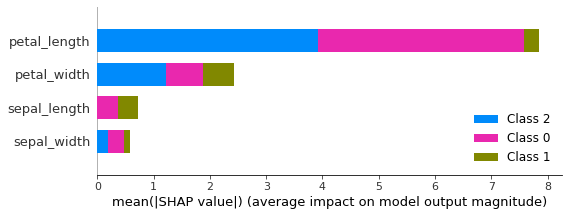

In [46]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")